# **Determine The Status Of Loan**

## **Building A Model**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns
%matplotlib inline

### **Reading Data**

In [2]:
# Reading Training Dataset
Data = pd.read_csv(r'Data\TrainData.csv')

# Check Shape of datasets
print('Shape of Data',Data.shape)

Shape of Data (614, 13)


In [3]:
# Check the Head of Training dataset
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### **Descriptive Analysis**

In [4]:
# Descriptive Analysis of Numerical Data
Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Descriptive Analysis of Categorical Data
Data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001194,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## **Data Cleaning**

### **Imputing Missing Values**

In [6]:
# Checking the Null values present in Training Data
Data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Function for Imputing Missing Values

def Impute_Missing_Val(DataFrame):
    # Imputing Missing values with Mode
    DataFrame['Gender'].fillna(DataFrame['Gender'].mode()[0],inplace=True)
    DataFrame['Married'].fillna(DataFrame['Married'].mode()[0],inplace=True)
    DataFrame['Self_Employed'].fillna(DataFrame['Self_Employed'].mode()[0],inplace=True)
    DataFrame['Dependents'].fillna(DataFrame['Dependents'].mode()[0],inplace=True)
    
    # Imputing Missing values with Median
    DataFrame['LoanAmount'].fillna(DataFrame['LoanAmount'].median(),inplace=True)
    DataFrame['Loan_Amount_Term'].fillna(DataFrame['Loan_Amount_Term'].median(),inplace=True)
    DataFrame['Credit_History'].fillna(DataFrame['Credit_History'].median(),inplace=True)  
    return Data

In [8]:
# Lets Impute Missing values in Training Data using Function
Impute_Missing_Val(Data)

# Check if Missing values are present in Data
Data.isnull().sum().sum()

0

### **Removing Outliers**

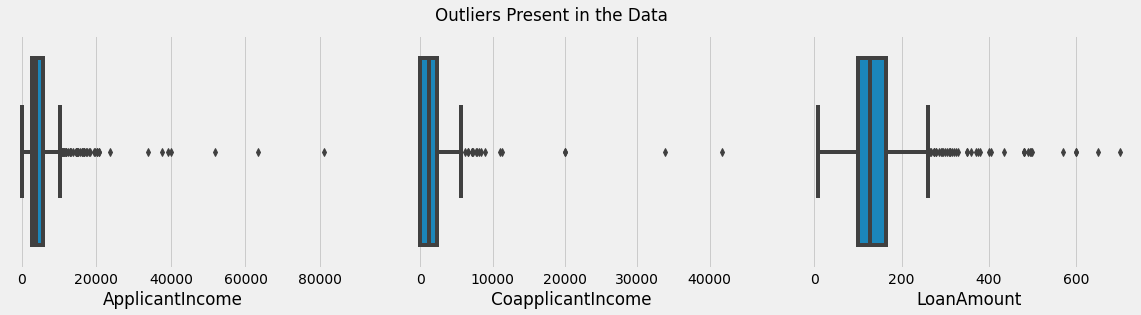

In [9]:
# Lets See Outliers Using Boxplot

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.style.use('fivethirtyeight')

# visualize the Outliers using boxplot
plt.rcParams['figure.figsize'] = (18,4)

plt.subplot(1,3,1)
sns.boxplot(Data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(Data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(Data['LoanAmount'])

plt.suptitle('Outliers Present in the Data')
plt.show()

In [10]:
# Removing Outliers

# Check Shape of data before removing outliers
print('Shape of Data before removing outliers:',Data.shape)

# Remove the customers having more than 25000 income
Data=Data[Data['ApplicantIncome']<25000]

# Remove the customers having more than 10000 coapplicant income
Data=Data[Data['CoapplicantIncome']<10000]

# Remove the customers having more than 400 loan amount
Data=Data[Data['LoanAmount']<400]

# check the shape of data after removing outliers
print('Shape of Data after removing outliers:',Data.shape)

Shape of Data before removing outliers: (614, 13)
Shape of Data after removing outliers: (590, 13)


## **Exploratory Data Analysis**

### **Univariate Analysis**

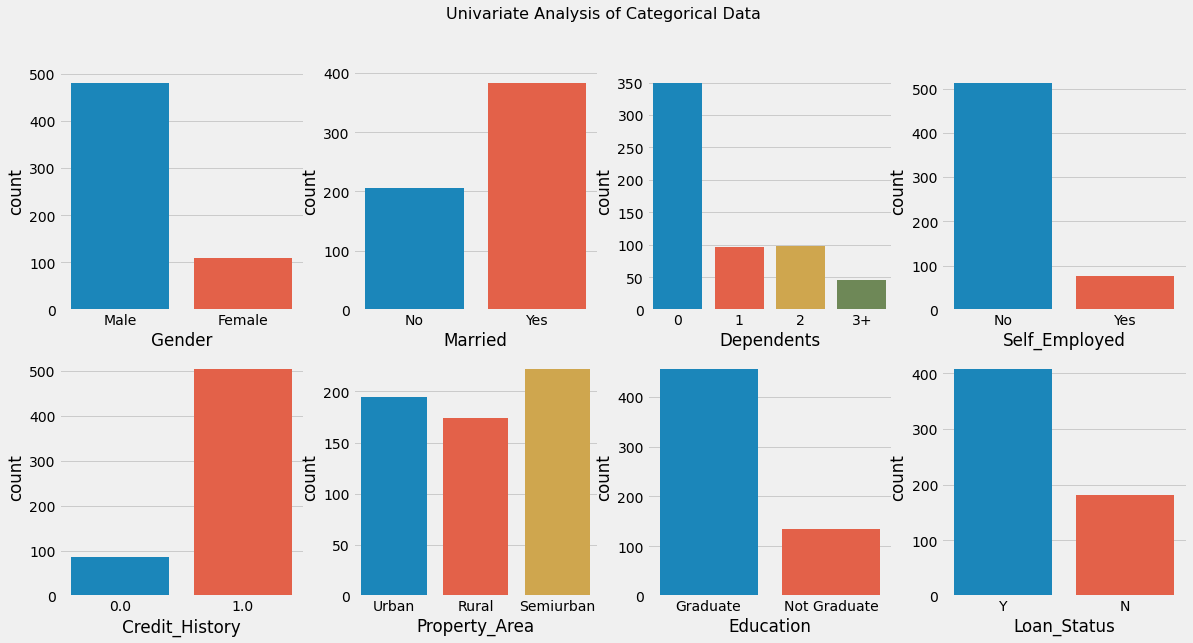

In [11]:
# Univariate Analysis of Categorical Data using countplot

# Lets plot the chart using countplot method
plt.rcParams['figure.figsize'] = (18,9)

plt.subplot(2, 4, 1)
sns.countplot(Data['Gender'])

plt.subplot(2, 4, 2)
sns.countplot(Data['Married'])

plt.subplot(2, 4, 3)
sns.countplot(Data['Dependents'])

plt.subplot(2, 4, 4)
sns.countplot(Data['Self_Employed'])

plt.subplot(2, 4, 5)
sns.countplot(Data['Credit_History'])

plt.subplot(2, 4, 6)
sns.countplot(Data['Property_Area'])

plt.subplot(2, 4, 7)
sns.countplot(Data['Education'])

plt.subplot(2, 4, 8)
sns.countplot(Data['Loan_Status'])

plt.suptitle('Univariate Analysis of Categorical Data', fontsize=16)
plt.show()

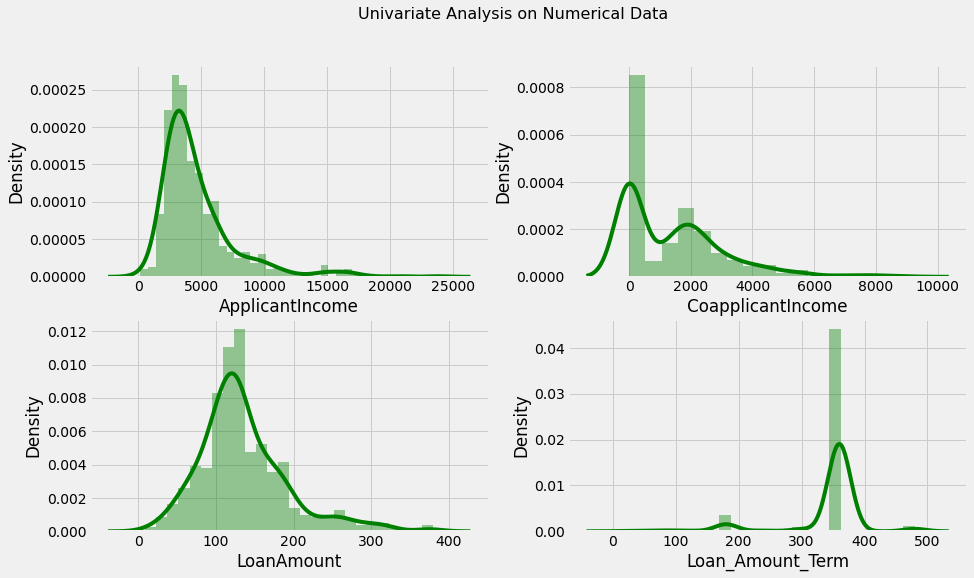

In [12]:
# Univariate Analysis of Numerical data using distplot
plt.rcParams['figure.figsize'] = (14,8)

plt.subplot(2,2,1)
sns.distplot(Data['ApplicantIncome'], color = 'green')

plt.subplot(2,2,2)
sns.distplot(Data['CoapplicantIncome'], color = 'green')

plt.subplot(2,2,3)
sns.distplot(Data['LoanAmount'], color = 'green')

plt.subplot(2,2,4)
sns.distplot(Data['Loan_Amount_Term'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Data', fontsize=16)
plt.show()

### **Bivariate Data Analysis**

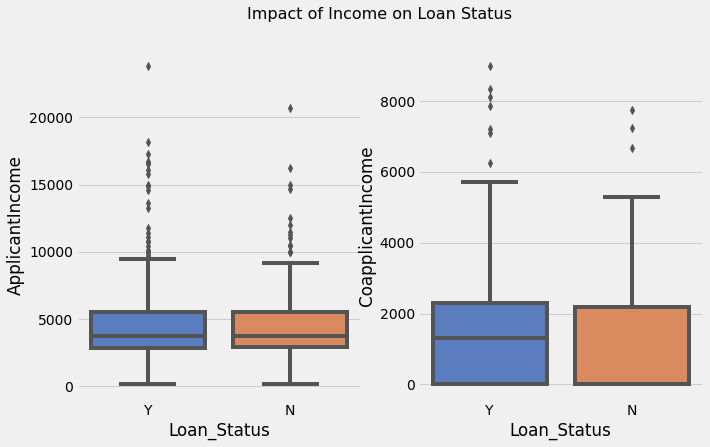

In [13]:
# Check the Impact of Income of Applicant and Co-applicant on Loan Status

# Plot the chart using violinplot
plt.rcParams['figure.figsize'] = (10,6)

plt.subplot(1, 2, 1)
sns.boxplot(x='Loan_Status', y='ApplicantIncome',data=Data, palette='muted')

plt.subplot(1, 2, 2)
sns.boxplot(x='Loan_Status', y='CoapplicantIncome',data=Data,palette='muted')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 16)
plt.show()

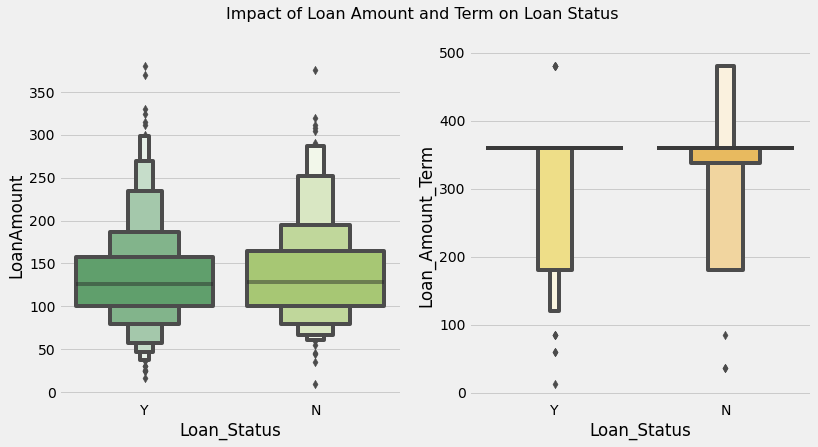

In [14]:
# Checks the Impact of Loan Amount and Loan Amount Term on Loan Status

plt.rcParams['figure.figsize'] = (12, 6)

plt.subplot(1, 2, 1)
sns.boxenplot(x='Loan_Status',y='LoanAmount', data=Data, palette='summer')

plt.subplot(1, 2, 2)
sns.boxenplot(x='Loan_Status',y='Loan_Amount_Term', data=Data, palette='Wistia')

plt.suptitle('Impact of Loan Amount and Term on Loan Status\n', fontsize = 16)
plt.show()

Bivariate Analysis of Categorical Data

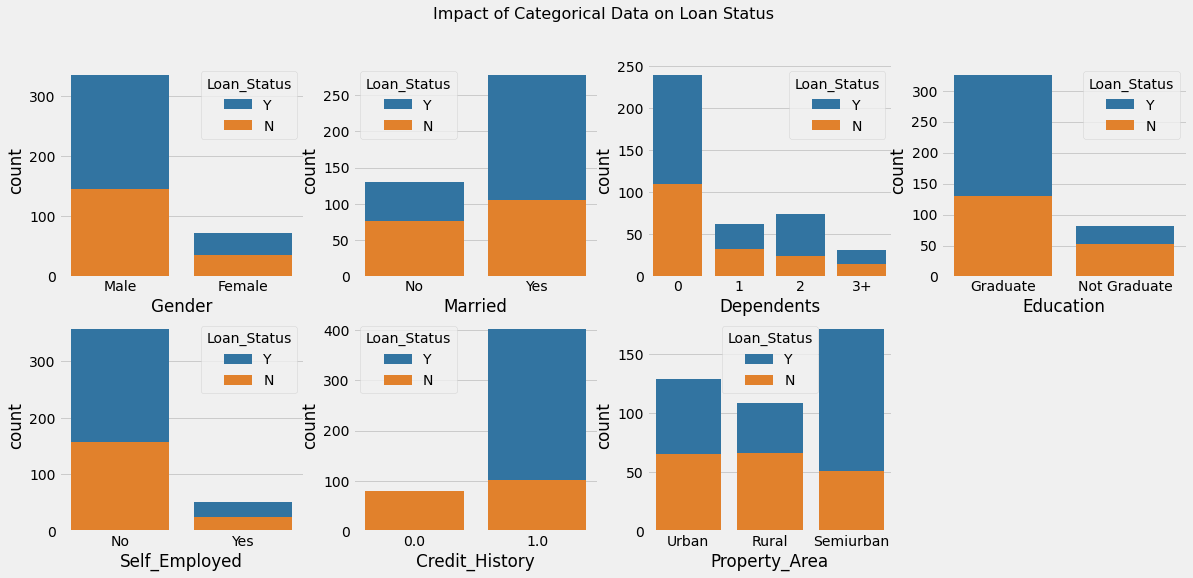

In [15]:
# Compare all the Categories with respect to the Loan Status to understand the Overall Impact

# plot the chart using countplot 
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,4,1)
sns.countplot(x="Gender",hue="Loan_Status",dodge=False, data=Data, palette='tab10')

plt.subplot(2,4,2)
sns.countplot(x="Married",hue="Loan_Status",dodge=False, data=Data, palette='tab10')

plt.subplot(2,4,3)
sns.countplot(x="Dependents",hue="Loan_Status",dodge=False, data=Data, palette='tab10')

plt.subplot(2,4,4)
sns.countplot(x="Education",hue="Loan_Status",dodge=False, data=Data, palette='tab10')

plt.subplot(2,4,5)
sns.countplot(x="Self_Employed",hue="Loan_Status",dodge=False, data=Data, palette='tab10')

plt.subplot(2,4,6)
sns.countplot(x="Credit_History",hue="Loan_Status",dodge=False, data=Data, palette='tab10')

plt.subplot(2,4,7)
sns.countplot(x="Property_Area",hue="Loan_Status",dodge=False, data=Data, palette='tab10')

plt.suptitle('Impact of Categorical Data on Loan Status', fontsize=16)
plt.show()


## **Data Preparation**

### **Data Encoding**

In [16]:
# check the columns which are of object type
Data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
# Lets Drop the Loan_ID Column it has no relation with Loan Status
Data.drop('Loan_ID',axis=1,inplace=True)

In [18]:
# before converting check the Unique Values of categorical data
print('Unique Values are:')
print(' Gender:',Data['Gender'].unique())
print(' Married:',Data['Married'].unique())
print(' Dependents:',Data['Dependents'].unique())
print(' Education:',Data['Education'].unique())
print(' Self_Employed:',Data['Self_Employed'].unique())
print(' Property_Area:',Data['Property_Area'].unique())
print(' Loan_Status:',Data['Loan_Status'].unique())

Unique Values are:
 Gender: ['Male' 'Female']
 Married: ['No' 'Yes']
 Dependents: ['0' '1' '2' '3+']
 Education: ['Graduate' 'Not Graduate']
 Self_Employed: ['No' 'Yes']
 Property_Area: ['Urban' 'Rural' 'Semiurban']
 Loan_Status: ['Y' 'N']


In [19]:
# Function for Numeric Conversiton

def Numeric_conversion(DataFrame):
    DataFrame['Gender'].replace(('Male','Female'),(1,0),inplace=True)
    DataFrame['Married'].replace(('Yes','No'),(1,0),inplace=True)
    DataFrame['Education'].replace(('Graduate','Not Graduate'),(1,0),inplace=True)
    DataFrame['Self_Employed'].replace(('Yes','No'),(1,0),inplace=True)
    
    # Urban and Semi Urban Property have very similar Impact on Loan Status, so, we will merge them together
    DataFrame['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0),inplace=True)
    
    # As seen above that apart from 0 dependents, all are similar hence, we merge them to avoid any confusion
    DataFrame['Dependents'].replace(('0','1','2','3+'),(0,1,1,1),inplace=True)
    return DataFrame

In [20]:
# Test Data isn't contain Loan_Status column So we put it outside of function
Data['Loan_Status'].replace(('Y','N'),(1,0),inplace=True)

In [21]:
# convert Categorical Data with Numeric using Function
Numeric_conversion(Data)

# Check whether there are any object type variable
Data.select_dtypes('object').columns

Index([], dtype='object')

### **Remvoe Skewness**

In [22]:
# Apply Sqare Root transformation and remove Skewness
Data= np.sqrt(Data)

In [23]:
# Check the head of DataSet
Data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,76.478755,0.000000,11.313708,18.973666,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,0.0,67.697858,38.832976,11.313708,18.973666,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,54.772256,0.000000,8.124038,18.973666,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,50.823223,48.559242,10.954451,18.973666,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,77.459667,0.000000,11.874342,18.973666,1.0,1.0,1.0


### **Set Target Column**

In [24]:
# Split the Target column from the Data
X = Data.drop(['Loan_Status'],axis=1)
Y = Data['Loan_Status']

# Check the Shape of X and Y
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (590, 11)
Shape of Y: (590,)


### **Resambling Data**

In [25]:
# Import the SMOTE algorithm to do the same.
from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE().fit_resample(X, Y)

# Check Shape of X and Y after resampling it
print('Shape of X:',x_res.shape)
print('Shape of X:',y_res.shape)
print('\n')

# Check the value counts of target variable
print("Before Resambling :")
print(Y.value_counts())
print("\n After Resambling :")
print(y_res.value_counts())

Shape of X: (816, 11)
Shape of X: (816,)


Before Resambling :
1.0    408
0.0    182
Name: Loan_Status, dtype: int64

 After Resambling :
0.0    408
1.0    408
Name: Loan_Status, dtype: int64


### **Data Spliting**

In [26]:
# Split the Data for Training Model and Testing Model
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.20,
                                                    random_state=0,shuffle= True, stratify=y_res)

print("Shape of the X Train :", X_train.shape)
print("Shape of the Y Train :", y_train.shape)
print("Shape of the X Test :", x_test.shape)
print("Shape of the Y Test :", y_test.shape)

Shape of the X Train : (652, 11)
Shape of the Y Train : (652,)
Shape of the X Test : (164, 11)
Shape of the Y Test : (164,)


## **Machine Learning Model**

### **Choosing the evaluation metric**

In [27]:
# Formula to get accuracy
def get_accuracy(y_true, y_preds):
    # Getting score of confusion matrix
    from sklearn.metrics import confusion_matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_preds).ravel()
    # Calculating accuracy
    accuracy = (true_positive + true_negative)/(true_negative + false_positive + false_negative + true_positive)
    return accuracy

### **Creating some baseline models**

#### **Logistic Regression Classifier**

In [28]:
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [29]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### **Naive Bayes Classifier**

In [30]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

#### **Random Forest Classifier**

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

#### **KNN Classifier**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

#### **Decision Tree Classifier**

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

#### **SVM Classifier**

In [34]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear', random_state=0)  
SVM.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

#### **Gradient Boosting Classifier**

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

### **Evaluation of accuracy on validation data**

In [36]:
models = [LR, GNB, RF, KNN, DT, SVM, GBC]
acc = []
for model in models:
    preds_val = model.predict(x_test)
    accuracy = get_accuracy(y_test, preds_val)
    acc.append(accuracy*100)

In [37]:
model_name = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'KNN', 'Decision Tree', 'SVM', 'GradientBoost']
accuracy = dict(zip(model_name, acc))

In [38]:
sorted_accuracy = dict(sorted(accuracy.items(), key=lambda x: x[1], reverse=True))

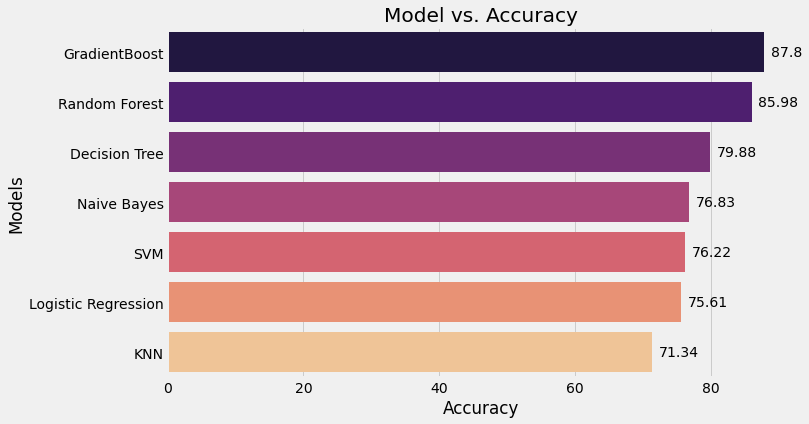

In [39]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x = list(sorted_accuracy.values()), y = list(sorted_accuracy.keys()), palette= 'magma')
for p, value in zip(ax.patches, list(sorted_accuracy.values())):
    _x = p.get_x() + p.get_width()+1
    _y = p.get_y() + p.get_height()/2
    ax.text(_x, _y, round(value, 2), ha="left",va='center')
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Model vs. Accuracy")
plt.show()

### **Hyperparameter Tuning**

In [40]:
# Hyperparameter Tuning on Gradient Boosting Classifier
# Import GridSearch Modul 
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate':[0.07,0.1,0.15], 'n_estimators':[50,80,100,150,200],'max_depth':[3,4,5,6,7,8]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=0), param_grid=parameters,cv=10)

tuning.fit(X_train,y_train)

print(tuning.best_params_)

{'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 50}


#### **Fitting Best Parameters**

In [41]:
GBC = GradientBoostingClassifier(learning_rate= 0.07, n_estimators= 50, max_depth=4, random_state=0)
GBC.fit(X_train, y_train) 
y_pred = GBC.predict(x_test)

#### **Accuracy**

In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy : %s '%'{0:.2%}'.format(accuracy_score(y_test, y_pred)))

Accuracy : 87.20% 


#### **Confusion Matrix**

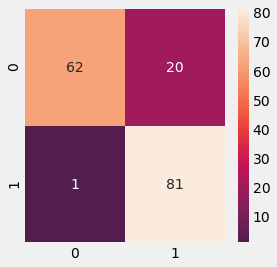

In [43]:
from sklearn.metrics import confusion_matrix
Conf_Matrix = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.rcParams['figure.figsize'] = (4,4)
sns.heatmap(Conf_Matrix, annot = True, fmt = '.8g',center=30,cmap="rocket")
plt.show()

#### **Classification Report**

In [44]:
# Check the Classification report for performance analysis

from sklearn.metrics import  classification_report
Class_Report = classification_report(y_test, y_pred)
print(Class_Report)

              precision    recall  f1-score   support

         0.0       0.98      0.76      0.86        82
         1.0       0.80      0.99      0.89        82

    accuracy                           0.87       164
   macro avg       0.89      0.87      0.87       164
weighted avg       0.89      0.87      0.87       164



#### **Cross Validation**

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GBC, X_train, y_train, cv=10)
print(scores)
print('\n Cross-Validation Score :%s '%'{0:.2%}'.format(scores.mean()))

[0.78787879 0.8030303  0.92307692 0.86153846 0.87692308 0.8
 0.89230769 0.81538462 0.8        0.84615385]

 Cross-Validation Score :84.06% 


### **Feature Importance**

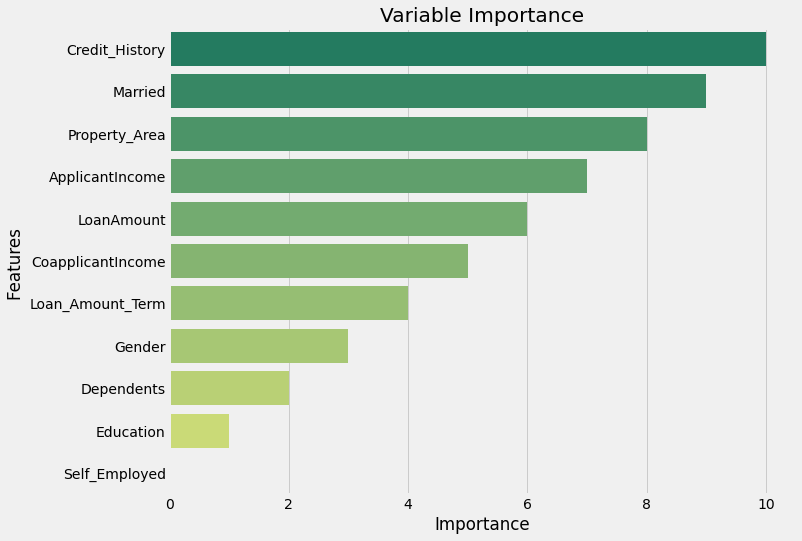

In [46]:
# Get important feature
feature_importance = GBC.feature_importances_

feature_importance = 100*(feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_importance =feature_importance[sorted_idx]
pos = np.arange(sorted_idx.shape[0])

plt.rcParams['figure.figsize'] = (10,8)
sns.barplot(pos,sorted_feature_importance,orient='h', palette= 'summer')
plt.yticks(pos,Data.columns[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Features ")
plt.title('Variable Importance')
plt.show()

## **Predict Loan Eligibility Status**

In [47]:
# Read Test Data Set
Test_Data = pd.read_csv(r'Data\TestData.csv')

# Check the Shape
print('Shape is ',Test_Data.shape)

# Check if the Null Values are present
print('Null Values are :',Test_Data.isnull().sum().sum())

# Check Head of dataset
Test_Data.head()

Shape is  (367, 12)
Null Values are : 84


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [48]:
# Impute Missing Values using function which was created earlier
Impute_Missing_Val(Test_Data)
print('Null Values are:',Test_Data.isnull().sum().sum())

# Convert To Numeric Values using function which was created earlier
Numeric_conversion(Test_Data)
print('Object Data Type:',Data.select_dtypes('object').columns)

# Store Loan ID
loan_id=Test_Data['Loan_ID']

# Test Data Transformation
Test_Data = np.sqrt(Test_Data.drop('Loan_ID',axis=1))


Null Values are: 0
Object Data Type: Index([], dtype='object')


In [49]:
# Predict Target Variable and Store it
result = GBC.predict(Test_Data)

# Convert to pandas DataFrame
result=pd.DataFrame(result,columns={'Loan_Status'})

In [50]:
# Replace the Values of 1 and 0 by Y and N
result['Loan_Status'].replace((1, 0),('Y', 'N'),inplace=True)

# Set Index as Loan_ID which was stored in loan_id earlier
result.set_index(loan_id, inplace=True)

# Check the Head of Data
result.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


### **Store The Result**

In [51]:
# Store the Final result
result.to_csv(r'Output\Result.csv')